* Project: LSMS_ag_prod 
* Created on: Feb 2025
* Created by: rg
* Edited on: 12 May 25
* Edited by: rg

* does
	* creates graph LSMS timeline
    * Uganda is muted 

* notes:
    * data is created in this file
    * to save figure, file path needs to be updated manually.

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
# define file path (save figure)
save_path = '/Users/rodrigoguerra/Library/CloudStorage/OneDrive-UniversityofArizona/ag_prod/graphs&tables/figures/'

In [3]:
# create data 

data = pd.DataFrame({
    "country" : ["Ethiopia", "Ethiopia", "Ethiopia", "Ethiopia", "Ethiopia",
                 "Malawi", "Malawi", "Malawi", "Malawi", 
                 "Mali", "Mali", 
                 "Niger", "Niger", 
                 "Nigeria", "Nigeria", "Nigeria", "Nigeria",
                 "Tanzania", "Tanzania", "Tanzania", "Tanzania", "Tanzania"] , 
                 #"Uganda", "Uganda", "Uganda", "Uganda", "Uganda", "Uganda", "Uganda"], 

    "survey" :  ["ESS", "ESS", "ESS", "ESS", "ESS",
                 "IHPS", "IHPS", "IHPS", "IHPS", 
                 "EACI", "EACI", 
                 "ECVMA", "ECVMA", 
                 "GHS", "GHS", "GHS", "GHS",
                 "NPS", "NPS", "NPS", "NPS", "NPS"], 
                 #"UNPS", "UNPS", "UNPS", "UNPS", "UNPS", "UNPS", "UNPS"], 

    "wave" :    ["Wave 1", "Wave 2", "Wave 3", "Wave 4", "Wave 5",
                 "Wave 1", "Wave 2", "Wave 3", "Wave 4", 
                 "Wave 1", "Wave 2", 
                 "Wave 1", "Wave 2", 
                 "Wave 1", "Wave 2", "Wave 3", "Wave 4",
                 "Wave 1", "Wave 2", "Wave 3", "Wave 4", "Wave 5"], 
                 #"Wave 1", "Wave 2", "Wave 3", "Wave 4", "Wave 5", "Wave 7", "Wave 8"], 

    "start_year" : [2010.5, 2012.5, 2014.5, 2017.5, 2021.5,
                    2009.5, 2012.5, 2015.5, 2018.5, 
                    2014, 2017,  
                    2011, 2014, 
                    2010.5, 2012.5, 2015.5, 2018.5, 
                    2008.5, 2010.5, 2012.5, 2014.5, 2019.5] , 
                   # 2009.3, 2010.5, 2011.7, 2013.9, 2015.5, 2018.2, 2019.3],

    "end_year" :    [2011.5, 2013.5, 2015.5, 2018.5, 2022.5,
                    2010.5, 2013.5, 2016.5, 2019.5, 
                    2015, 2018,  
                    2012, 2015, 
                    2011.5, 2013.5, 2016.5, 2019.5, 
                    2009.5, 2011.5, 2013.5, 2015.5, 2021.2] , 
                   # 2010.3, 2011.5, 2012.7, 2014.9, 2016.5, 2019.2, 2020.3],

})

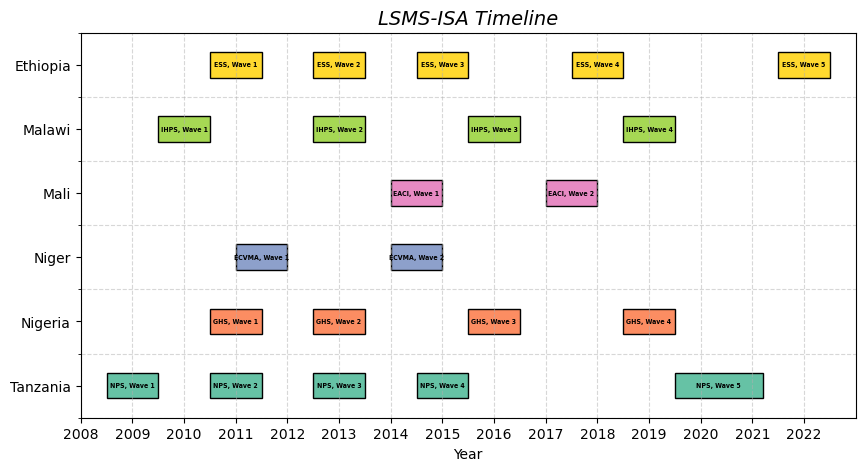

In [4]:
# assign positions for countries (ensures bars are between horizonal gridlines)
unique_countries = sorted(data["country"].unique(), reverse = True)
data["country_pos"] = data["country"].apply(lambda x: unique_countries.index(x) * 2 + 1) 

# create figure and axis
fig, ax = plt.subplots(figsize = (10, 5))

# assign a color for each country
colors = sns.color_palette("Set2", len(unique_countries))
country_colors = dict(zip(unique_countries, colors))

# adjust y-axis positions for bars, labels, and gridlines
y_positions = [i * 2 + 1 for i in range(len(unique_countries))]  
grid_positions = [i * 2 for i in range(len(unique_countries) + 1)]  

# plot bars for each survey wave
for _, row in data.iterrows():
    ax.barh(y=row["country_pos"], 
            width=row["end_year"] - row["start_year"], 
            left=row["start_year"], 
            height=0.8, 
            color=country_colors[row["country"]], edgecolor="black")

    # text inside bars
    ax.text(row["start_year"] + (row["end_year"] - row["start_year"]) / 2, 
            row["country_pos"], 
            f"{row['survey']}, {row['wave']}", 
            ha = "center", va = "center", fontsize = 4.5, fontweight = "bold", color = "black")

# align country names (y-lables) with bars
ax.set_yticks(y_positions)  
ax.set_yticklabels(unique_countries, fontsize = 10)

# range and labels of x-axis
ax.set_xticks(range(2008, 2023, 1))
ax.set_xlim(2008, 2023)
ax.set_xlabel("Year", fontsize = 10)

# keep gridlines positioned between two horizontal gridlines
ax.set_yticks(grid_positions, minor=True)  
ax.grid(axis = "y", linestyle = "--", alpha = 0.5, which = "minor") 
ax.grid(axis = "x", linestyle = "--", alpha = 0.5)

# tittle 
ax.set_title("LSMS-ISA Timeline", fontsize=14, style = "italic")

# save plot 
plt.savefig(f"{save_path}LSMS_timeline.pdf", format = "pdf", bbox_inches = "tight")
plt.show()
